# Episode 03 d - Multiplotter

build from puzzle

autoregister states 

changed init 

multiplotter

same interface for one and multi

# TODO multifigs in matplotlib

In [1]:
import matplotlib.pyplot as plt
import numpy as np

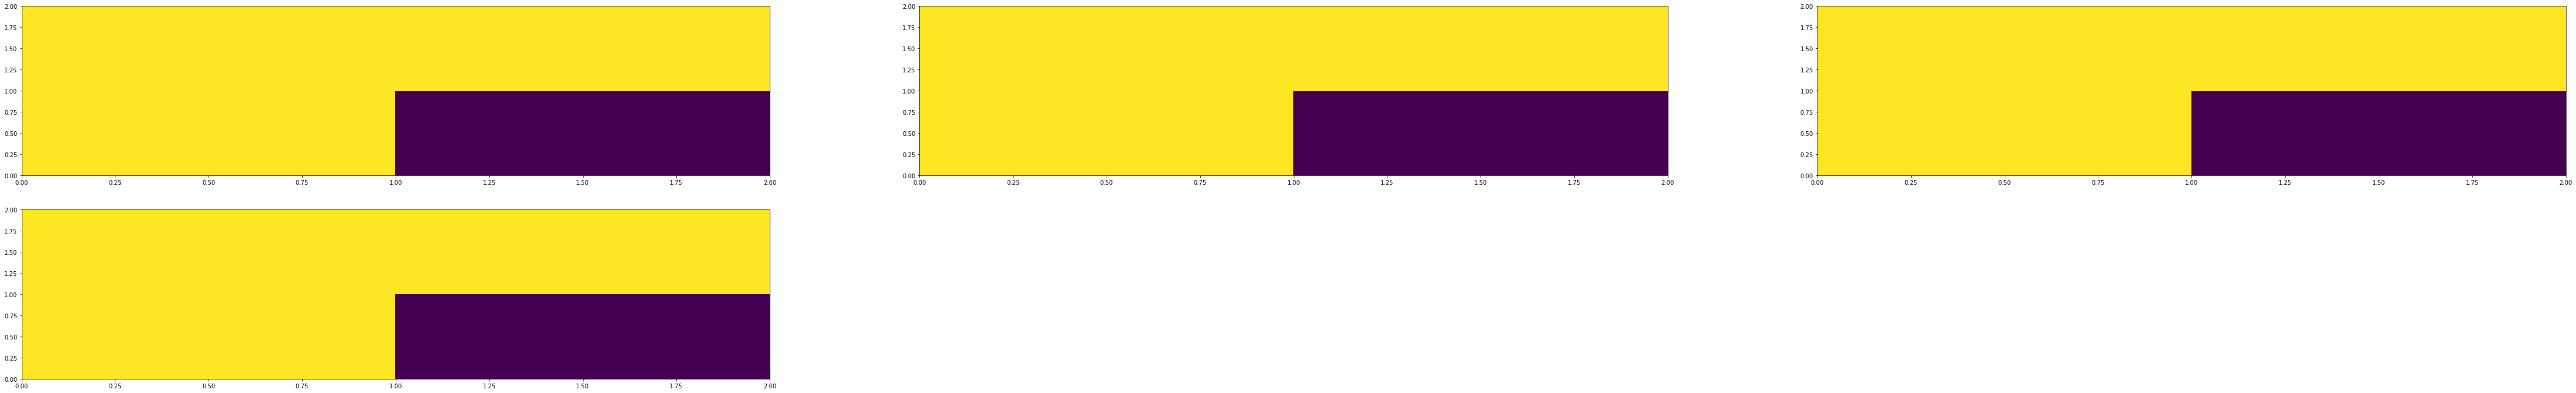

In [2]:
fig = plt.figure()
fig.subplots_adjust(left=5, right=15, top=12, bottom=5)
plt.rcParams['figure.figsize'] = [1, 1]
data = np.array([1,0,1,1]).reshape((2,2))
ax = fig.add_subplot(6, 3, 1)
heatmap = ax.pcolor(data)
ax = fig.add_subplot(6, 3, 2)
heatmap = ax.pcolor(data)
ax = fig.add_subplot(6, 3, 3)
heatmap = ax.pcolor(data)
ax = fig.add_subplot(6, 3, 4)
heatmap = ax.pcolor(data)
plt.show() # plt is static

# updated class

In [3]:
from episode01 import clues2x2, clues5x5s
from episode02 import solution2x2, solution5x5s
from episode03b import Puzzle, Board, BoardMark

In [4]:
import numpy as np
from math import ceil

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap

class BoardPlotter:
    '''
    Plot the board.
    Requiere %matplotlib inline .
    '''
    
    def __init__(self, a_puzzle):
        self.clues = a_puzzle.given_clues
        
        # board dimensions
        self.width = len(self.clues["rows"])
        self.height = len(self.clues["cols"])
        self.flat_length = self.width * self.height

        # guess the figure size 
        # rule of thumb
        # 1 fits 2 cells
        # 2 fits 5 cols
        self.fig_width = int(self.width/2) 
        self.fig_height = int(self.height /2) 

        # rows labels
        def row_clue_to_label(v):
            return str(v) if not isinstance(v, list) else ' '.join(map(str,v))
        self.rows_labels = list(map(row_clue_to_label, self.clues['rows']))

        # columns labels
        def col_clue_to_label(v):
            #print(v)
            return str(v) if not isinstance(v, list) else '\n'.join(map(str,v))
        self.columns_labels = list(map(col_clue_to_label, self.clues['cols']))

        # color map
        self.cmap = self.build_color_map()

        # collection of boards to be plotted
        self.boards = []
       
    
    def build_color_map(self):
        cdict = {'red': [(0.0, 0.6196078431372549, 0.6196078431372549),
          (0.5, 1.0, 1.0),
          (1.0, 0.03137254901960784, 0.03137254901960784)],
         'green': [(0.0, 0.792156862745098, 0.792156862745098),
          (0.5, 1.0, 1.0),
          (1.0, 0.18823529411764706, 0.18823529411764706)],
         'blue': [(0.0, 0.8823529411764706, 0.8823529411764706),
          (0.5, 1.0, 1.0),
          (1.0, 0.4196078431372549, 0.4196078431372549)],
         'alpha': [(0.0, 1.0, 1.0),
          (0.5, 1.0, 1.0),
          (1.0, 1.0, 1.0)]}
        nono_cmap = LinearSegmentedColormap('nono', cdict)
        return nono_cmap

        
    def show(self, a_board):
        # set some canvas
        fig, ax = plt.subplots(figsize=(self.fig_width, self.fig_height))
        self._plot(a_board, ax)
        plt.show() # plt is static


    def append_board(self, a_board):
        self.boards.append(a_board)
       
        
    def show_all(self, some_boards=None):
        boards = some_boards
        if some_boards is None:
            boards = self.boards
        
        # max 12
        # TODO nb depending on board size
        cols_mapping = {2: 7, 5:5}
        n_cols = cols_mapping[self.width]
        n_lines = ceil(len(boards)/n_cols)

        fig = plt.figure()
        fig.subplots_adjust(left=5, right=15, top=13, bottom=5)

        for i, board in enumerate(boards):
            # enumerate is base 0. figures are labelled base 1
            # TODO explain slots names
            plt.rcParams['figure.figsize'] = [self.fig_width, self.fig_height]
            ax = fig.add_subplot(n_lines, n_cols, i+1)
            self._plot(board, ax)
       
        plt.show() # plt is static
       
    
    # private method
    def _plot(self, a_board, ax):
        # WARNING :  the board is row col, while the fig is col row
        if isinstance(a_board, Board):
            data = a_board.states
        else:
            data = a_board # assumes an np array
        
        # set some canvas
        #fig, ax = plt.subplots(figsize=(self.fig_width, self.fig_height))
        
        # draw a heatmap
        heatmap = ax.pcolor(data, cmap=self.cmap, vmin=-1, vmax=1)

        # ensure square cells
        ax.set_aspect("equal")

        # put the major ticks at the middle of each cell
        ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
        ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)

        # put labels on top
        ax.invert_yaxis()
        ax.xaxis.tick_top()

        # set labels
        ax.set_xticklabels(self.columns_labels, minor=False)
        ax.set_yticklabels(self.rows_labels, minor=False)


        # annotate fillers
        # expect (col,row) is (1,0) for row=0 col=1
        fillers_coordinates = [(p%self.width + 0.5, int(p/self.width) + 0.5) 
                               for (p,v) in enumerate(data.reshape(self.flat_length)) 
                               if v==0]

        # place an X in the center of each coordinate for fillers
        for coord in fillers_coordinates:
            ax.text(coord[0], coord[1], 'X', 
                 verticalalignment='center_baseline',
                 horizontalalignment='center',
                 fontsize='xx-large')

        


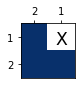

In [5]:
puzzle2x2 = Puzzle(clues2x2)
board2x2 = Board(puzzle2x2)
board2x2.states.flat[:] = solution2x2
plotter2x2 = BoardPlotter(puzzle2x2)
plotter2x2.show(board2x2)

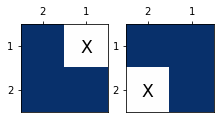

In [6]:
puzzle2x2 = Puzzle(clues2x2)
board2x2 = Board(puzzle2x2)
plotter2x2 = BoardPlotter(puzzle2x2)

states1 = np.array([1,0,1,1]).reshape((2,2))
states2 = np.array([1,1,0,1]).reshape((2,2))

plotter2x2.show_all([states1, states2])

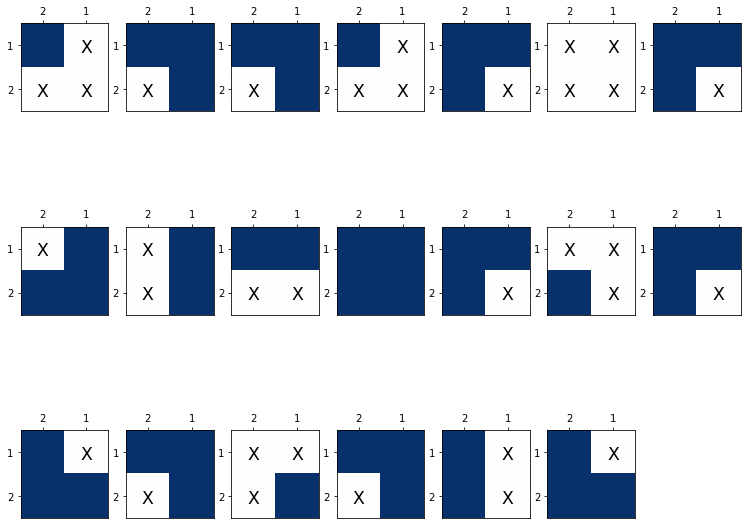

In [7]:
import random

puzzle2x2 = Puzzle(clues2x2)
board2x2 = Board(puzzle2x2)
plotter2x2 = BoardPlotter(puzzle2x2)

states_list = []
for i in range(20):
    states_float = np.random.rand(2, 2)
    f = np.vectorize(round)
    states = f(states_float) 
    states_list.append(states)
    
plotter2x2.show_all(states_list)

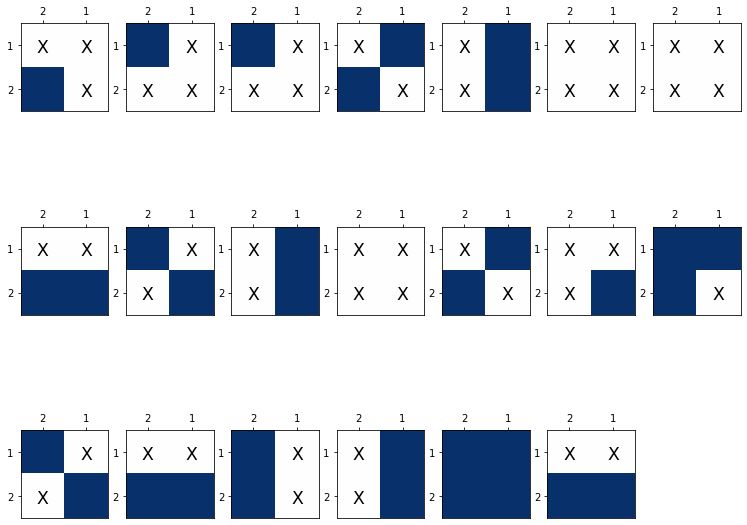

In [8]:
import random

puzzle2x2 = Puzzle(clues2x2)
board2x2 = Board(puzzle2x2)
plotter2x2 = BoardPlotter(puzzle2x2)

states_list = []
for i in range(20):
    states_float = np.random.rand(2, 2)
    f = np.vectorize(round)
    states = f(states_float) 
    plotter2x2.append_board(states)
    
plotter2x2.show_all()

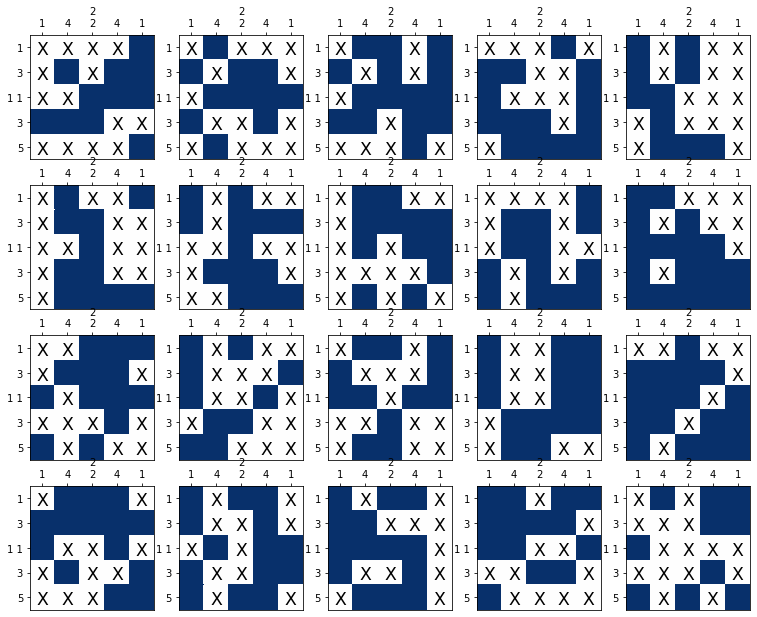

In [9]:
# 5x5
import random

puzzle5x5 = Puzzle(clues5x5s)
board5x5 = Board(puzzle5x5)
plotter5x5 = BoardPlotter(puzzle5x5)

states_list = []
for i in range(20):
    states_float = np.random.rand(5, 5)
    f = np.vectorize(round)
    states = f(states_float) 
    states_list.append(states)
    
plotter5x5.show_all(states_list)

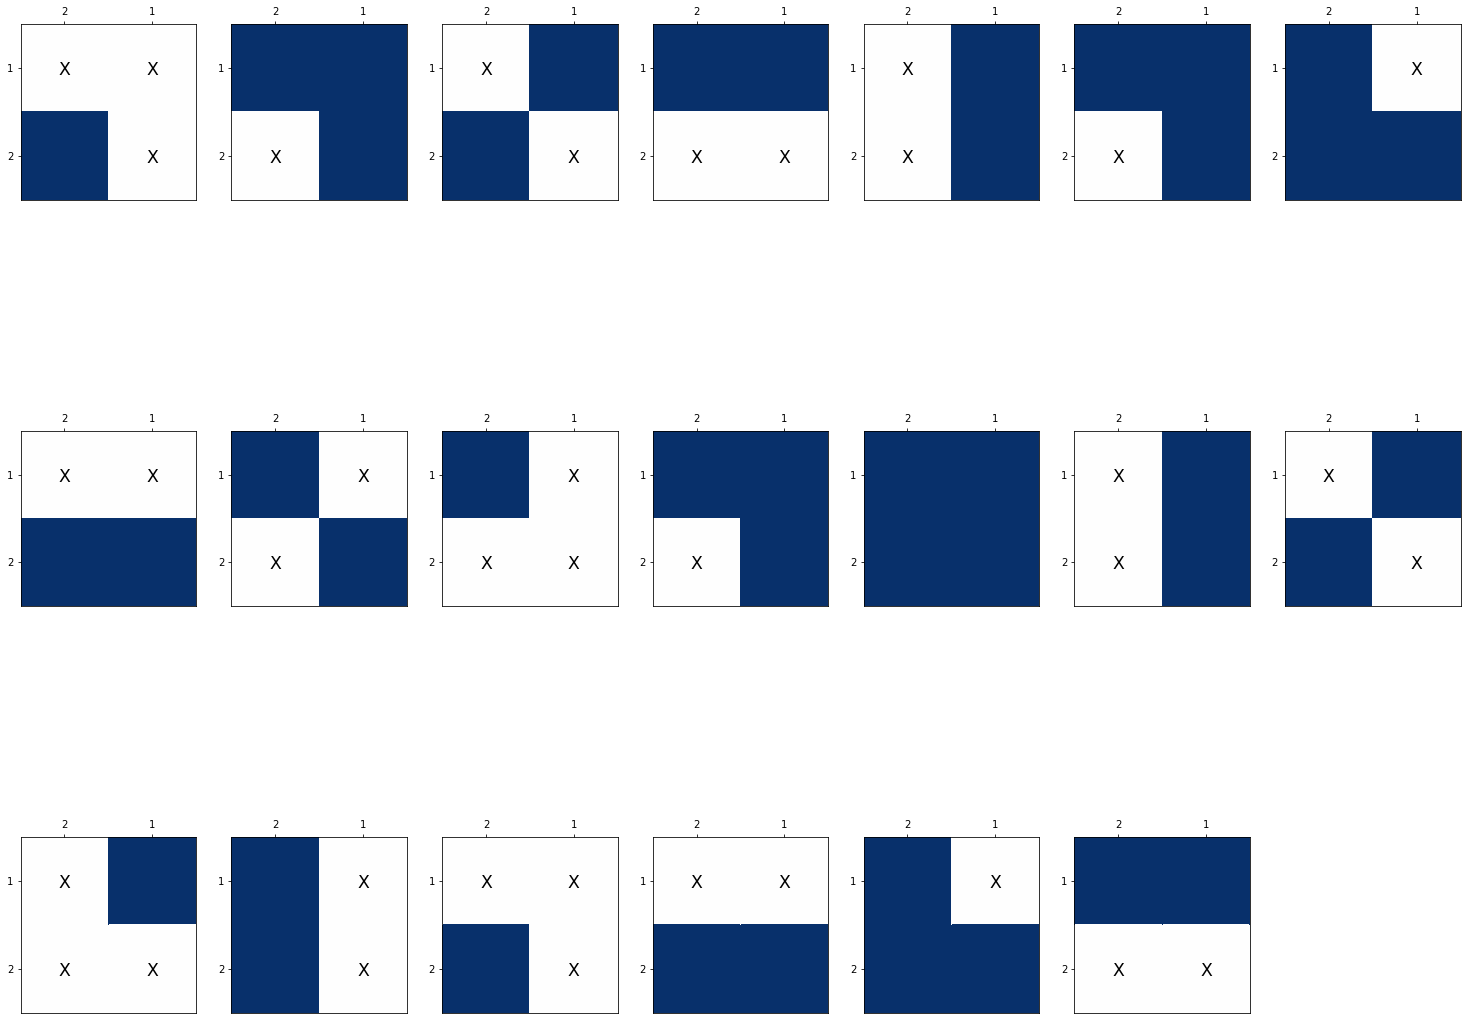

In [10]:
import random
import numpy as np

puzzle2x2 = Puzzle(clues2x2)
board2x2 = Board(puzzle2x2)
plotter2x2 = BoardPlotter(puzzle2x2)

states_list = []
for i in range(20):
    states_float = np.random.rand(2, 2)
    f = np.vectorize(round)
    states = f(states_float) 
    plotter2x2.append_board(states)
    
plotter2x2.show_all()

# 3.1. Change to Game engine

for tracking

In [11]:
from episode03c import BoardGameEngine

In [12]:
import numpy as np

class BoardGameEngine:
    '''
    Provide utilities for board game
    '''
    
    def __init__(self, a_puzzle):
        '''
        Engine constructor
        '''
            
        self.puzzle = a_puzzle
        
        # init a board
        self.board = Board(a_puzzle)
        self.plotter = BoardPlotter(a_puzzle)
        
        
    def show(self):
        ''' 
        Plot the board
        '''
        self.plotter.show(self.board)  
        

In [13]:
import numpy as np
from itertools import groupby
from operator import mul

class NonoGameEngine(BoardGameEngine):
    '''
    Provide utilities for nonogram game without given solution
    '''
    
    def __init__(self, a_puzzle, track=False):
        '''
        Engine constructor
        '''
            
        super().__init__(a_puzzle)
        
        self.track = track
        self.board_states_history = []

        
    def play(self, row, col, mark, apply=True):
        ''' 
        Play the game by sending the state of one cell
        Always return True
        If apply, update the board
        '''
        if apply:
            # apply the given state 
            self.board.mark(row, col, mark)
            if self.track:
                self.board_states_history.append(self.board.states.copy())
        return True  
    
    
    # todo append submissions`
    # todo autofill
    def submit(self, states_list):
        ''' 
        Submit the solution and give all the cells's state in one action
        Check whether the states given a the registered solution (assumes it has been given)
        Returns the number of errors
        black missing are counted as errors - fillers are ignored
        '''
        self.board.fill_all(states_list)
        if self.track:
            self.board_states_history.append(self.board.states.copy())
            
        # board is okay if without errors on blacks
        return self.count_errors()
           
        
    def is_solved(self):
        '''
        Check whether the puzzle is solved
        Accept that filler cells are left undefined. 
        In other words only take blacks into account
        '''
        return self.count_errors() == 0
    
    
    def count_empty(self):
        return self.board.count_empty()
    
    
    # todo document that ignore unfilled
    def count_errors(self):
        '''
        Compute the difference between given board and clues
        '''
        
        # for rows
        board_rows = self.get_rows_blocks()
        clues_rows = self.puzzle.norm_clues["rows"]
        rows_errors = sum([abs(sum(b)-sum(c)) for (b,c) in zip(board_rows, clues_rows)])
        # for cols
        board_cols = self.get_cols_blocks()
        clues_cols = self.puzzle.norm_clues["cols"]
        cols_errors = sum([abs(sum(b)-sum(c)) for (b,c) in zip(board_cols, clues_cols)])
        return int((rows_errors + cols_errors)/2) # row error => col error

    
    def get_rows_blocks(self):
        '''
        Compute blocks for each rows
        '''
        
        rows = self.board.states
        blocks = [ [len(list(g)) for k,g in groupby(line) if k==1]
                   for line in rows]
        return blocks

    
    def get_cols_blocks(self):
        '''
        Compute blocks for each cols
        '''
        
        w = self.board.states.shape[0]
        h = self.board.states.shape[1]
        length = mul(w, h)
        cols = [ [self.board.states.reshape(length)[c+r*w]
                     for r in range(0, h)]
                 for c in range(0, w)]
        blocks = [ [len(list(g)) for k,g in groupby(line) if k==1]
                   for line in cols]
        return blocks    

    
    def show_all(self):
        if self.track:
            self.plotter.show_all(self.board_states_history)  
        else:
            print("tracking is off")


In [14]:
# no errors 
puzzle2x2 = Puzzle(clues2x2)
game2x2 = NonoGameEngine(puzzle2x2)

game2x2.play(0, 0, BoardMark.BLACK) 
game2x2.play(1, 0, BoardMark.BLACK) 
game2x2.play(1, 1, BoardMark.BLACK) 

game2x2.show_all()

tracking is off


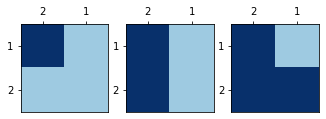

In [15]:
# no errors 
puzzle2x2 = Puzzle(clues2x2)
game2x2 = NonoGameEngine(puzzle2x2, track=True)

game2x2.play(0, 0, BoardMark.BLACK) 
game2x2.play(1, 0, BoardMark.BLACK) 
game2x2.play(1, 1, BoardMark.BLACK) 

game2x2.show_all()

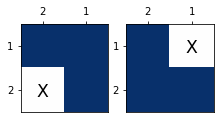

In [16]:
# submit with errors
puzzle2x2 = Puzzle(clues2x2)
game2x2 = NonoGameEngine(puzzle2x2, track=True)

game2x2.submit([1,1,0,1])
game2x2.submit([1,0,1,1])

game2x2.show_all()

In [17]:
class SolvedNonoGameEngine(NonoGameEngine):
    '''
    Provide utilities for nonogram game without with given  solution
    '''
    
    def __init__(self, a_puzzle, a_solution, track=False):
        '''
        Engine constructor
        '''
        super().__init__(a_puzzle, track)
            
        self.solution = a_solution
        self.flat_solution = self.solution.reshape(self.puzzle.cells_count).tolist()
        
        # init score
        self.errors = 0
        
        
    def play(self, row, col, mark, apply=True):
        ''' 
        Play the game by sending the state of one cell
        Check whether an action is valid given a solution 
        If apply, update the board
        '''
        okay = self.solution[row, col] == mark.value   
        if not okay:
            self.errors += 1
           
        if apply:
            # apply the real state which is what games usually do
            true_mark = BoardMark(self.solution[row, col])
            self.board.mark(row, col, true_mark)
            if self.track:
                self.board_states_history.append(self.board.states.copy())
        return okay    

    
    # TODO accept np array
    def submit(self, states_list, apply=True):
        ''' 
        Submit the solution and give all the cells's state in one action
        Check whether the states given a the registered solution 
        '''
        if apply:
            self.board.fill_all(states_list)
        
        if self.track:
            self.board_states_history.append(self.board.states.copy())

        # board is okay when blacks are correrct
        self.errors = sum([abs(p-e) for (p,e) in zip(states_list, self.flat_solution) if p>=0])
        return self.errors
    
    
    # todo document that ignore unfilled
    def count_errors(self):
        return self.errors 


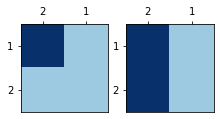

In [18]:
# one at a time 
puzzle2x2 = Puzzle(clues2x2)
game2x2 = SolvedNonoGameEngine(puzzle2x2, solution2x2, track=True)
okay = game2x2.play(0, 0, BoardMark.FILLER) # error -> fixed but colunted error
okay = game2x2.play(1, 0, BoardMark.BLACK) # correct
game2x2.show_all()

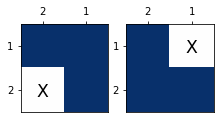

In [19]:
# submit with errors
puzzle2x2 = Puzzle(clues2x2)
game2x2 = SolvedNonoGameEngine(puzzle2x2, solution2x2, track=True)

game2x2.submit([1,1,0,1])
game2x2.submit([1,0,1,1])

game2x2.show_all()

# TODO Wrap up

## 8.1. Quick test of saved class

In [20]:
%reset -f

In [21]:
from episode01 import clues2x2, clues5x5s, Board, BoardMark
from episode02 import solution2x2, solution5x5s
from episode03b import Puzzle, Board, BoardMark
from episode03d import NonoGameEngine, SolvedNonoGameEngine

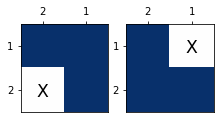

In [23]:
# base
puzzle2x2 = Puzzle(clues2x2)
game2x2 = NonoGameEngine(puzzle2x2, track=True)

game2x2.submit([1,1,0,1])
game2x2.submit([1,0,1,1])

game2x2.show_all()

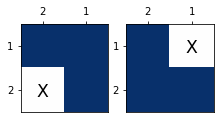

In [24]:
# with solution
puzzle2x2 = Puzzle(clues2x2)
game2x2 = SolvedNonoGameEngine(puzzle2x2, solution2x2, track=True)

game2x2.submit([1,1,0,1])
game2x2.submit([1,0,1,1])

game2x2.show_all()

# TODO annotate

```
%matplotlib qt
    plt.show()
    #fig.show()
    #p, = plt.plot(data)
    #ptint(p)
    #plt.draw()
    #plt.pause(0.01)
    #plt.clf()
    #data[1,1] = 1
    #p.set_data(1,1,1)
    #plt.draw()
    #plt.pause(0.0001)
    #plt.clf()
    fig.canvas.draw() # Draws the image to the screen
    plt.pause(1) # Delay in seconds
    data[1,1] = 1
    # struggled with set_data
    heatmap = ax.pcolor(data, cmap=my_cmap) 
    fig.canvas.draw() # Draws the image to the screen

    #fig.savefig(output, format="png")
```